In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


# In[40]:


df = pd.read_csv('heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


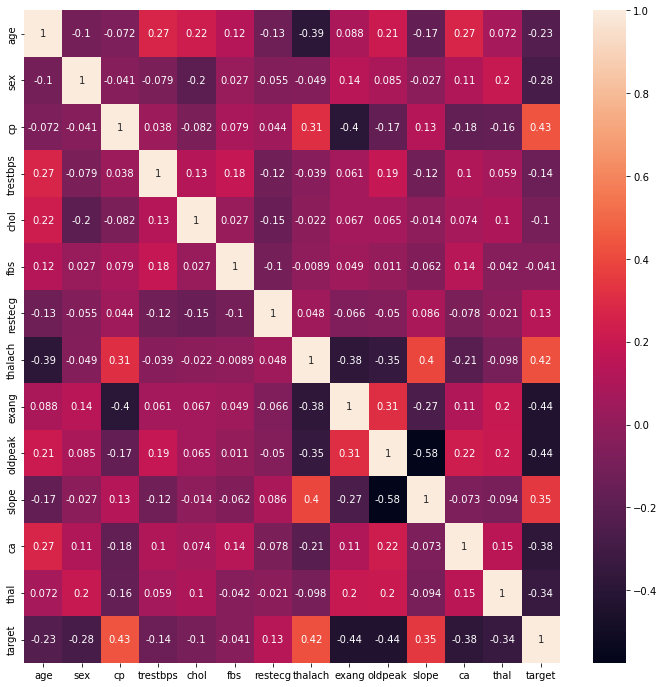

In [341]:
corrMatrix = df.corr()
plt.figure(figsize=(12, 12))
sn.heatmap(corrMatrix, annot=True)
plt.show()

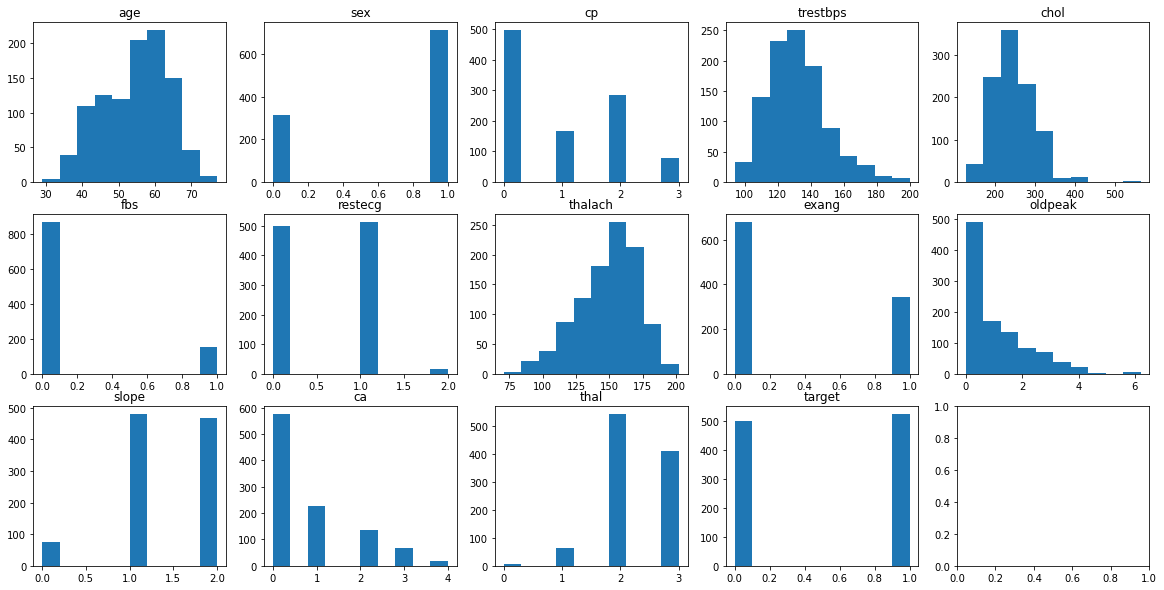

In [342]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))

# loop over each column in the dataframe and plot a histogram on the corresponding subplot
for i, column in enumerate(df.columns):
    row = i // 5
    col = i % 5
    axs[row, col].hist(df[column])
    axs[row, col].set_title(column)


In [343]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [344]:
nan_df = df.isna()
nan_df.sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [345]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# threshold = 1.5
# lower_bound = Q1 - threshold * IQR
# upper_bound = Q3 + threshold * IQR
# outliers = (df < lower_bound) | (df > upper_bound)
# df_outliers = df.loc[outliers.any(axis=1)]
# df_outliers

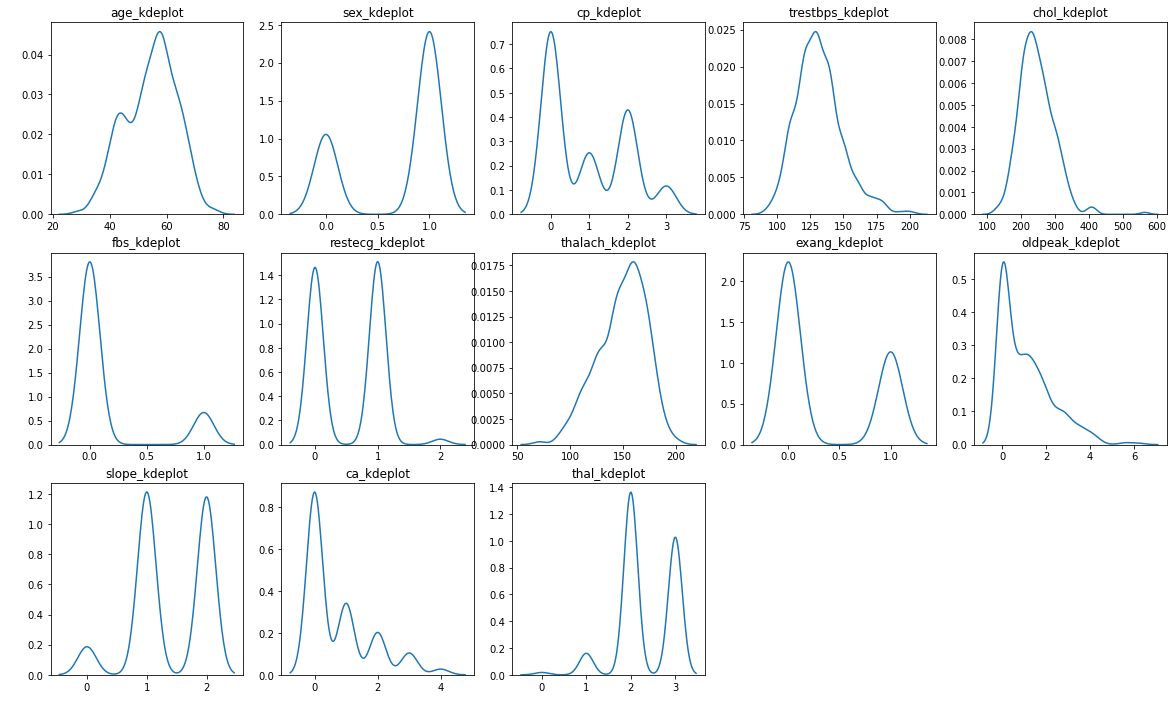

In [346]:
feature_list = df.columns.tolist()
feature_list.remove("target")

cols = 5
n=len(feature_list)

rows = int(np.ceil(n/cols))
plt.figure(figsize=(cols*4 , rows*4))

i=0
for val in feature_list:
    i += 1
    plt.subplot(rows, cols, i)
    sn.kdeplot(x=val,data=df)
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.title(val +"_kdeplot")

In [347]:
#create dummy variable

a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [348]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [350]:
from sklearn.preprocessing import MinMaxScaler


bool_cols = df.select_dtypes(include='bool').columns

# extract numerical columns
num_cols = df.select_dtypes(include='number').columns

# create a scaler object for numerical columns
scaler = MinMaxScaler()

# fit and transform numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# replace boolean values with 1 for True and 0 for False
df[bool_cols] = df[bool_cols].astype(int)

# print normalized dataframe
print(df)


           age  sex  trestbps      chol  fbs  restecg   thalach  exang  \
0     0.479167  1.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1     0.500000  1.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2     0.854167  1.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3     0.666667  1.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4     0.687500  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   
...        ...  ...       ...       ...  ...      ...       ...    ...   
1020  0.625000  1.0  0.433962  0.216895  0.0      0.5  0.709924    1.0   
1021  0.645833  1.0  0.292453  0.301370  0.0      0.0  0.534351    1.0   
1022  0.375000  1.0  0.150943  0.340183  0.0      0.0  0.358779    1.0   
1023  0.437500  0.0  0.150943  0.292237  0.0      0.0  0.671756    0.0   
1024  0.520833  1.0  0.245283  0.141553  0.0      0.5  0.320611    0.0   

       oldpeak    ca  ...  cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  \
0     0.161290  0.50  ...   0.0 

In [351]:
from sklearn.cluster import KMeans

# Generate some example data
X_pre = df.drop(['target'], axis = 1)
# Define the number of clusters
n_clusters = 5

# Fit the K-means model to the data
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_pre)

# Get the distances to the closest cluster for each observation
distances = kmeans.transform(X_pre)
min_distances = np.min(distances, axis=1)

# Define a threshold for the distances
threshold = np.percentile(min_distances, 95)

# Identify the outliers
outliers = X_pre[min_distances > threshold]

# Print the number of outliers
print(f"Number of outliers: {len(outliers)}")

outliers.head()

outliers.index

Number of outliers: 50


Int64Index([   6,   28,   30,   46,   69,   93,  104,  114,  121,  132,  135,
             150,  175,  206,  210,  264,  294,  308,  323,  338,  345,  379,
             389,  393,  399,  405,  462,  508,  526,  528,  569,  612,  624,
             652,  661,  664,  669,  688,  713,  717,  770,  780,  796,  801,
             819,  896,  903,  927,  972, 1013],
           dtype='int64')

In [352]:
df.drop(index = outliers.index)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.479167,1.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.500000,1.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.854167,1.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.666667,1.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.687500,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.75,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1021,0.645833,1.0,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1022,0.375000,1.0,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1023,0.437500,0.0,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [353]:
from sklearn.model_selection import train_test_split


y = df.target.values
X = df.drop(['target'], axis = 1)
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2,random_state=1)


In [354]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [355]:
#SVM model

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)

acc = svm.score(X_test,Y_test)*100
prediction = svm.predict(X_test)
# accuracies = []
# accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 87.32%


In [356]:
accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))


accuracy is 0.8731707317073171
precision is 0.8365384615384616
recall is 0.90625
f1 score is 0.87
area under the curve is 0.8751433486238532


In [357]:
#knn model

from sklearn.neighbors import KNeighborsClassifier

for i in range(1,10):
    knn_iter = KNeighborsClassifier(n_neighbors = i)
    knn_iter.fit(X_train, Y_train)
    prediction_iter = knn_iter.predict(X_test)
    accuracy_iter = accuracy_score(Y_test, prediction_iter)
    precision_iter = precision_score(Y_test, prediction_iter)
    recall_iter = recall_score(Y_test, prediction_iter)
    f1_iter = f1_score(Y_test, prediction_iter)
    auc_iter = roc_auc_score(Y_test, prediction_iter)
    print("k = "+str(i))
    print("accuracy is " + str(accuracy_iter))
    print("precision is " + str(precision_iter))
    print("recall is " + str(recall_iter))
    print("f1 score is " + str(f1_iter))
    print("area under the curve is " + str(auc_iter))
    print("")




knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, Y_test)*100))


k = 1
accuracy is 1.0
precision is 1.0
recall is 1.0
f1 score is 1.0
area under the curve is 1.0

k = 2
accuracy is 0.9609756097560975
precision is 1.0
recall is 0.9166666666666666
f1 score is 0.9565217391304348
area under the curve is 0.9583333333333333

k = 3
accuracy is 0.9512195121951219
precision is 0.9777777777777777
recall is 0.9166666666666666
f1 score is 0.946236559139785
area under the curve is 0.9491590214067277

k = 4
accuracy is 0.9024390243902439
precision is 0.975
recall is 0.8125
f1 score is 0.8863636363636362
area under the curve is 0.8970756880733944

k = 5
accuracy is 0.8634146341463415
precision is 0.8695652173913043
recall is 0.8333333333333334
f1 score is 0.851063829787234
area under the curve is 0.8616207951070336

k = 6
accuracy is 0.8634146341463415
precision is 0.9047619047619048
recall is 0.7916666666666666
f1 score is 0.8444444444444444
area under the curve is 0.8591360856269112

k = 7
accuracy is 0.8536585365853658
precision is 0.84375
recall is 0.84375
f1 

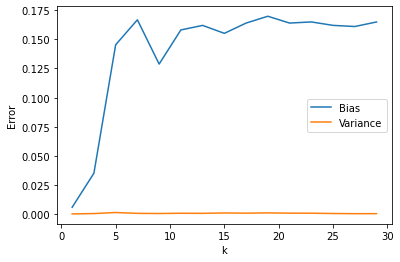

In [358]:
from sklearn.model_selection import cross_val_score


k_values = np.arange(1, 30, 2)

# Calculate bias and variance for each value of k
bias = []
variance = []
for k in k_values:
    knn_iter = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_iter, X, y, cv=10)
    bias.append(1 - np.mean(scores))
    variance.append(np.var(scores, ddof=1))

# Plot bias-variance tradeoff
plt.plot(k_values, bias, label='Bias')
plt.plot(k_values, variance, label='Variance')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.show()

In [359]:
accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))


accuracy is 0.8634146341463415
precision is 0.8695652173913043
recall is 0.8333333333333334
f1 score is 0.851063829787234
area under the curve is 0.8616207951070336


In [360]:
#random forest model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state = 1)
rf.fit(X_train, Y_train)

acc = rf.score(X_test,Y_test)*100
# accuracies['Random Forest'] = acc
prediction = rf.predict(X_test)

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))


Random Forest Algorithm Accuracy Score : 90.73%


In [361]:
# Random Forest Feature importance test
importances = rf.feature_importances_
for feature, importance in zip(range(X.shape[1]), importances):
    print('Feature {}: {}'.format(feature, importance)+"  "+ str(df.columns[feature]))



Feature 0: 0.04527501670169473  age
Feature 1: 0.025057150229826554  sex
Feature 2: 0.03312841515366434  trestbps
Feature 3: 0.04038751353640297  chol
Feature 4: 0.003671934371593172  fbs
Feature 5: 0.011470775425616692  restecg
Feature 6: 0.08096225037935115  thalach
Feature 7: 0.0751726786123512  exang
Feature 8: 0.09018361619973207  oldpeak
Feature 9: 0.12463711301384778  ca
Feature 10: 0.12651084057990863  target
Feature 11: 0.006941370526487609  cp_0
Feature 12: 0.01957867274912912  cp_1
Feature 13: 0.011560620001663413  cp_2
Feature 14: 0.0005817388560529532  cp_3
Feature 15: 0.003635876444883895  thal_0
Feature 16: 0.13307882130441637  thal_1
Feature 17: 0.08974651224472567  thal_2
Feature 18: 0.0033017840503958506  thal_3
Feature 19: 0.027502342796554394  slope_0
Feature 20: 0.047614956821701464  slope_1


Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

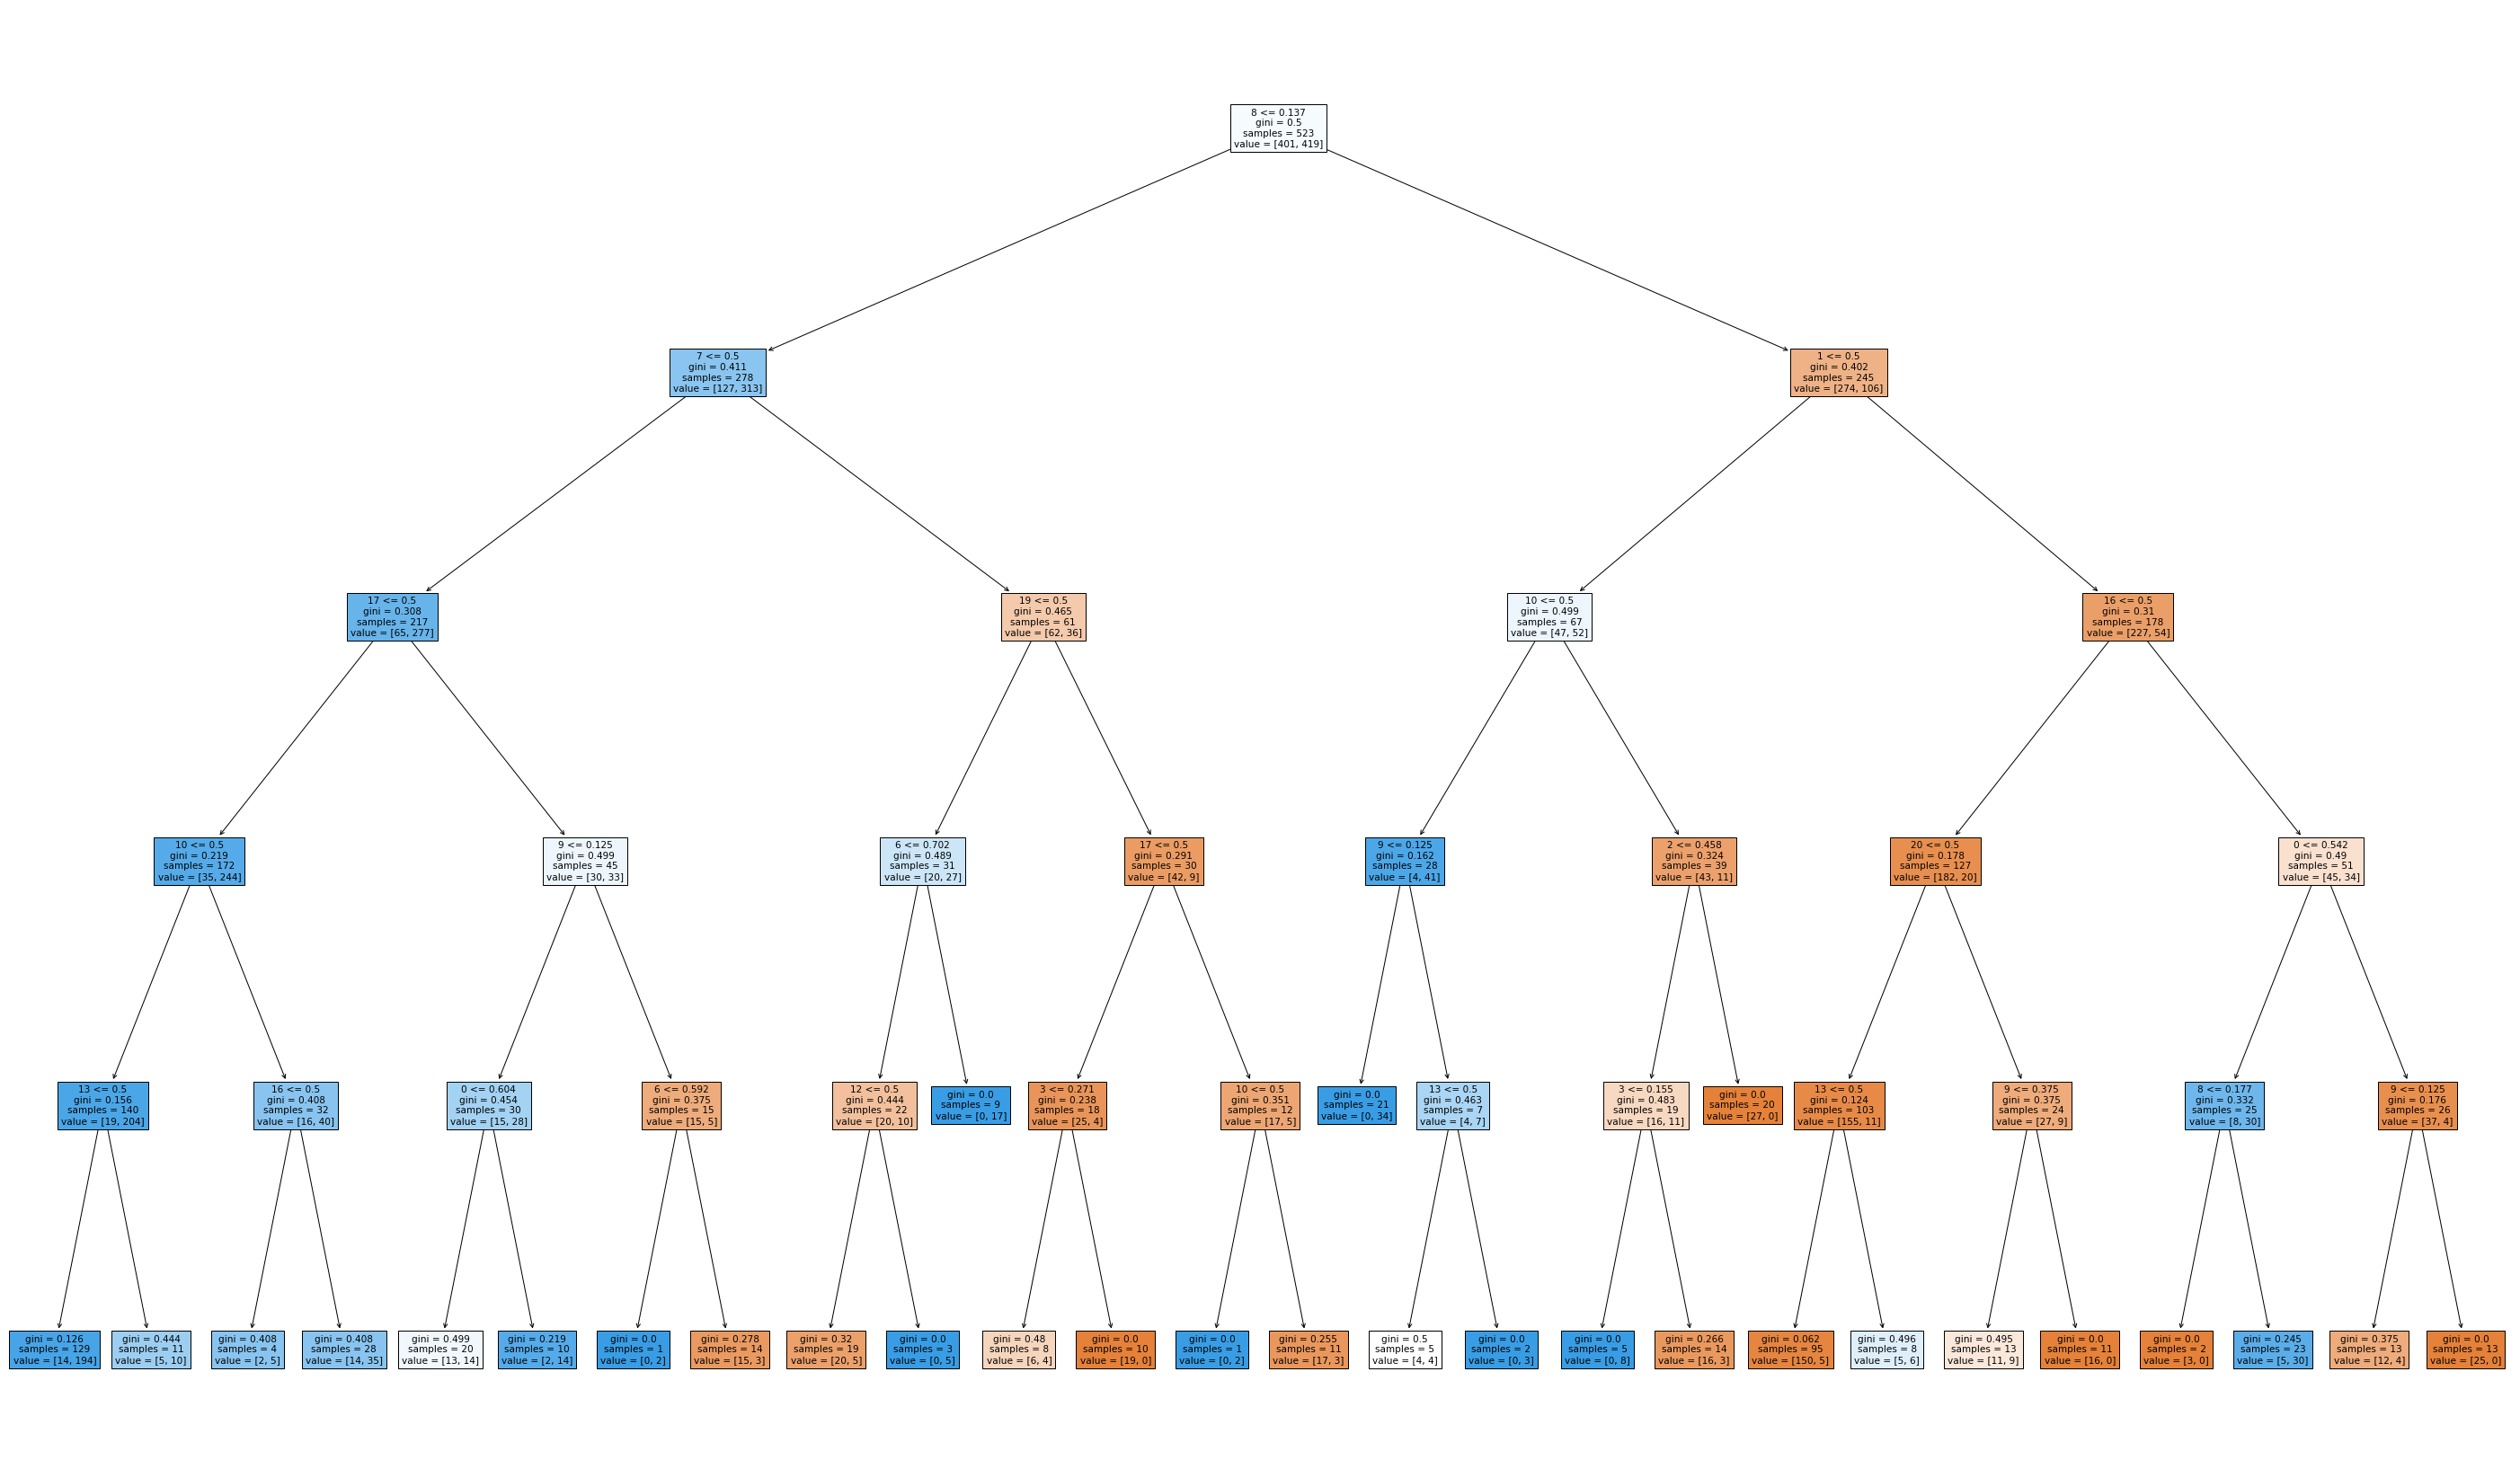

In [362]:
from sklearn import tree
plt.figure(figsize=(50, 30))
tree.plot_tree(rf.estimators_[0], feature_names=list(range(X.shape[1])), filled=True)
plt.show()


In [363]:
accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))


accuracy is 0.9073170731707317
precision is 0.8532110091743119
recall is 0.96875
f1 score is 0.9073170731707316
area under the curve is 0.910980504587156


In [364]:
#comfusiom matrix

from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(Y_test,svm.predict(X_test))
cm_knn = confusion_matrix(Y_test,knn.predict(X_test))
cm_rf = confusion_matrix(Y_test,rf.predict(X_test))

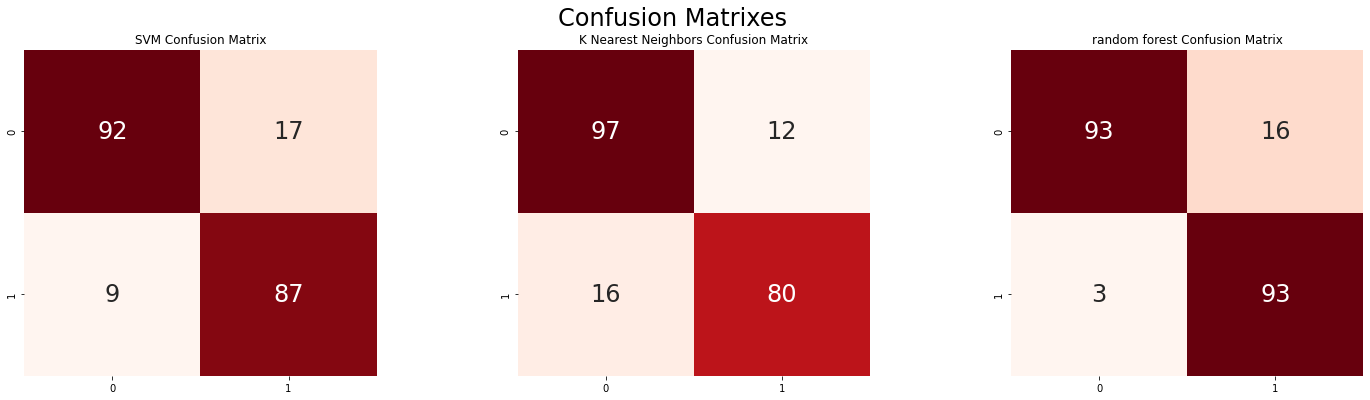

In [365]:
import seaborn as sns
plt.figure(figsize=(24,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,3)
plt.title("random forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()


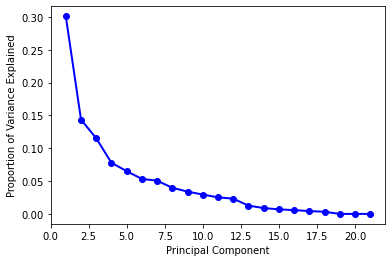

,0,1
0,PC0,thal_2
1,PC1,slope_1
2,PC2,cp_0
3,PC3,cp_1
4,PC4,sex
5,PC5,fbs
6,PC6,exang
7,PC7,slope_0
8,PC8,thal_1
9,PC9,cp_3


In [366]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()




features = X.columns[:-1]

model = PCA(n_components=15).fit(X_train)
X_pc = model.transform(X_train)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = features
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
Selected = pd.DataFrame(dic.items())
Selected

In [367]:
X_train = X_train[most_important_names]
X_test = X_test[most_important_names]

In [368]:
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)

acc = svm.score(X_test,Y_test)*100
prediction = svm.predict(X_test)
# accuracies = []
# accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))


accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))

Test Accuracy of SVM Algorithm: 88.29%
accuracy is 0.8829268292682927
precision is 0.8461538461538461
recall is 0.9166666666666666
f1 score is 0.8799999999999999
area under the curve is 0.8849388379204892


In [369]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)  # n_neighbors means k
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, Y_test)*100))

accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))


2 NN Score: 85.37%
accuracy is 0.8536585365853658
precision is 0.8666666666666667
recall is 0.8125
f1 score is 0.8387096774193549
area under the curve is 0.851204128440367


In [370]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state = 1)
rf.fit(X_train, Y_train)

acc = rf.score(X_test,Y_test)*100
# accuracies['Random Forest'] = acc
prediction = rf.predict(X_test)

print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

accuracy = accuracy_score(Y_test, prediction)
precision = precision_score(Y_test, prediction)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)
auc = roc_auc_score(Y_test, prediction)

print("accuracy is " + str(accuracy))
print("precision is " + str(precision))
print("recall is " + str(recall))
print("f1 score is " + str(f1))
print("area under the curve is " + str(auc))

Random Forest Algorithm Accuracy Score : 91.22%
accuracy is 0.9121951219512195
precision is 0.8679245283018868
recall is 0.9583333333333334
f1 score is 0.910891089108911
area under the curve is 0.9149464831804283


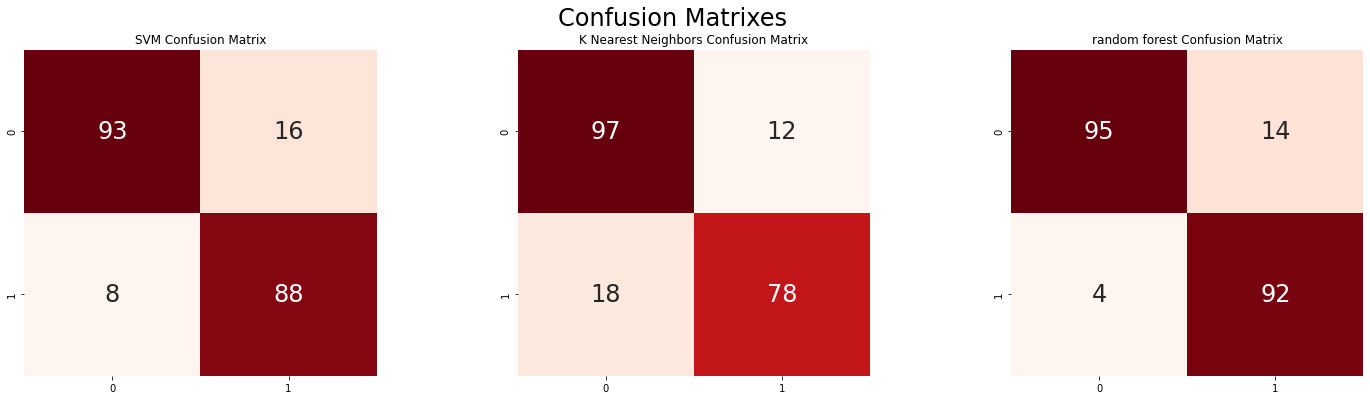

In [371]:
cm_svm = confusion_matrix(Y_test,svm.predict(X_test))
cm_knn = confusion_matrix(Y_test,knn.predict(X_test))
cm_rf = confusion_matrix(Y_test,rf.predict(X_test))

plt.figure(figsize=(24,6))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,3,3)
plt.title("random forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()